# cogs-118b-project

Use the "Run" button to execute the code.

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.preprocessing import normalize

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
mydata= pd.read_csv("features_30_sec.csv")
# mydata  has 1000 songs with 60 features

FileNotFoundError: [Errno 2] No such file or directory: 'features_30_sec.csv'

In [ ]:
mydata

Using PCA for dimensionality reduction.

In [4]:
# drop string variables for now
numbers = mydata.drop(["length", 'filename','label'], axis = 1)
numbers.shape

NameError: name 'mydata' is not defined

In [6]:
data_mean = np.mean(numbers, axis = 0)
data_mean.shape

(57,)

In [7]:
# zero mean the data
A = numbers - data_mean
A.shape

(1000, 57)

In [8]:
# compute the covariance matrix
B = np.cov(A.T)
B.shape

(57, 57)

In [9]:
# compute eigenvetors
eigval, Vold = np.linalg.eig(B)
indices = np.argsort(eigval)
indices = np.flip(indices)
Vold2 = Vold[indices]
# normalize eigenvectors
V_unit = normalize(Vold2, norm='l2', axis=0)
print(V_unit)

[[ 7.17706570e-09  1.17183317e-07 -5.34878759e-08 ... -5.04053614e-03
   1.93234503e-03 -3.46628825e-04]
 [ 2.01895112e-09 -8.64502562e-10  2.43596055e-09 ... -4.54220038e-02
   2.16263218e-03  1.76220107e-03]
 [ 9.39962837e-09  7.88048716e-08 -1.22115596e-07 ...  1.08867237e-01
   1.90287231e-02 -4.32080870e-03]
 ...
 [ 1.16011638e-06  2.61549788e-06 -1.69642032e-05 ...  1.95739895e-07
   8.25749298e-07 -3.99489592e-07]
 [-3.63827848e-07  2.90761838e-06 -6.23829463e-07 ...  2.37339634e-05
  -2.65370725e-05 -1.52333448e-05]
 [ 5.93021646e-07 -2.92317896e-06  1.61415171e-05 ... -6.01070755e-06
   5.64094173e-07  3.33391682e-08]]


In [10]:
# compute principal components
c = Vold.dot(A.T)
print(c.shape)
c[:5]

(57, 1000)


array([[ 3.88215110e+02, -4.49214347e+02,  4.37441553e+02, ...,
         4.27164527e+02,  2.09526634e+02,  4.02538416e+01],
       [-9.61322809e+00,  2.20662682e+01, -1.85135473e+01, ...,
        -2.41516958e+01, -7.09154503e+00, -5.31062108e+00],
       [ 2.12646661e+02, -2.53092119e+02,  2.23361842e+02, ...,
         2.15012921e+02,  1.09189820e+02,  1.73266470e+01],
       [-1.88591892e+01, -2.46476356e+01, -1.86723477e+01, ...,
        -3.18696520e+01, -3.18156372e+01,  1.30530183e+01],
       [-1.89396293e+05,  2.48049669e+05, -2.14930654e+05, ...,
        -2.13263546e+05, -9.98835557e+04, -8.87384757e+03]])

In [11]:
# Reconstruct pattern using 10 principal components
c_reduced = c[:10]
v_reduced = Vold[:,:10]
v_reduced.shape

(57, 10)

In [12]:
# # Just double checking that c has preserved the order of the original data
# c1 = Vold.dot(A[:1].T)
# z1 = np.dot(v_reduced,c1[:10])
# c1[:5]

In [13]:
z = np.dot(v_reduced,c_reduced)
print(z[:5])
z.shape[:5]

[[ 7.75922883e+00 -9.23666842e+00  8.68935781e+00 ...  8.48764685e+00
   4.18936730e+00  4.25198960e-01]
 [-3.52626591e+00  3.71167453e+00 -3.89989867e+00 ... -3.74665826e+00
  -1.97018469e+00 -3.63745183e-01]
 [-9.97579995e+00  9.24279961e+00 -1.08822455e+01 ... -1.02711551e+01
  -5.71518353e+00 -1.18360825e+00]
 [-9.85656130e-01  9.97768693e-01 -1.08554788e+00 ... -1.03724425e+00
  -5.55436484e-01 -1.08986132e-01]
 [ 1.27123671e+05 -1.53604334e+05  1.42962640e+05 ...  1.40227556e+05
   6.87983974e+04  1.06195807e+04]]


(57, 1000)

In [14]:
z1 = np.dot(v_reduced,c_reduced)

In [15]:
# Add back the mean
recon_data = pd.DataFrame(z).T + data_mean.array

In [16]:
print(recon_data.shape)
recon_data[:8]
recon_data.head()

(1000, 57)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,8.137911,-3.439926,-9.844870,-0.982605,129325.451880,468794.839289,44652.208406,137421.402941,160405.194545,1.844795e+06,13.113377,-0.029284,0.013596,-2.004518,0.037270,-0.865487,1920.310553,-215.207450,60246.686001,-3405.333268,167574.213475,-1015.151509,-5255.170122,-1556.576610,-63381.342145,-304.035142,-65577.411898,-1925.944342,-36633.517696,220.603237,-41327.626916,-1579.719100,-24054.260399,511.251095,-21316.219182,-1078.858049,-19511.299856,740.093197,-17470.158013,-495.582597,-13169.365159,471.542090,-11151.061323,40.835204,-8478.167652,314.566219,-7738.755372,313.502891,-8241.194240,391.477523,-8699.072115,-59.574453,-7196.618176,-147.476627,-6784.269069,410.619343,-5171.291110
1,-8.857987,3.798014,9.373729,1.000820,-151402.553116,470857.427018,-52013.947458,136585.459871,-201694.484228,1.843815e+06,-14.864786,0.017338,-0.018588,2.030215,-0.037665,0.787568,-1911.899228,-2854.183068,-70452.351372,4691.377963,-182967.121524,1459.086222,13554.780584,1686.241241,61959.140904,606.900163,64972.685481,1963.065458,36043.571376,-40.750511,41073.358323,1485.934518,23746.357295,-494.609312,21033.304699,998.438166,19263.555610,-681.462651,17126.690213,428.711999,12978.765220,-425.635580,10857.861279,-96.067941,8222.024792,-294.496389,7519.591535,-370.567845,8295.960012,-373.181133,8759.189743,-4.680732,7113.626110,182.658429,6726.123001,-463.827748,5082.746101
2,9.068040,-3.813559,-10.751316,-1.082496,145164.421020,468667.523994,50082.069377,137456.765570,181731.778406,1.844855e+06,14.660984,-0.030140,0.015534,-2.206948,0.041109,-0.940897,2130.838141,115.012782,67882.075744,-3884.603318,186910.847762,-1188.540813,-6913.075920,-1720.607215,-69367.420796,-381.368789,-71894.750705,-2120.734159,-40133.456560,211.723820,-45334.648638,-1722.680197,-26357.920026,555.162940,-23347.033489,-1174.659122,-21372.017396,802.038593,-19113.663133,-535.746446,-14411.538269,510.103976,-12178.523546,52.150810,-9249.076913,342.187194,-8442.971715,352.171231,-9037.578321,426.311560,-9541.489388,-56.864961,-7870.552189,-167.826817,-7419.859168,457.459231,-5635.792278
3,4.487727,-1.411869,-4.182453,-0.409442,55273.830227,469281.026354,29539.510332,137299.122274,79691.538160,1.844516e+06,4.819913,-0.021660,0.003848,-0.790743,0.009990,-0.405142,726.038038,-533.713021,32357.054953,-1352.335702,40635.173637,392.407315,7468.788223,-719.234318,-32893.505191,361.129948,-33463.340949,-800.067030,-18457.987430,487.435980,-20576.314718,-762.077324,-12264.262216,400.349135,-11215.352007,-511.131754,-10237.262063,495.420900,-9510.880312,-242.531750,-7305.050108,305.772652,-6506.205119,-2.682395,-5138.216986,170.490457,-4717.110956,111.897481,-4520.187015,232.424999,-4713.053553,-68.601441,-4139.204076,-11.867537,-3953.306124,186.031645,-3535.286645
4,1.682372,-0.957715,-3.176852,-0.306821,34083.692532,469515.706527,4322.920669,137095.157471,29817.899870,1.844467e+06,4.177173,-0.004388,0.003970,-0.661711,0.015979,-0.264544,733.360620,-796.849977,12021.021650,-671.265353,71943.739413,-826.493262,-6359.316798,-382.230432,-15512.801941,-383.389285,-16242.068140,-598.808450,-9327.674288,-185.076594,-10596.322962,-449.314665,-5982.462547,17.792023,-5025.544810,-319.235737,-4618.457270,105.451988,-3901.941872,-149.945862,-2806.171397,77.387334,-2161.351920,11.298016,-1496.478529,74.268668,-1337.964996,96.850255,-1730.641962,74.645471,-1872.732857,-5.366821,-1397.348735,-75.857540,-1267.155601,101.541071,-558.692593


Using KNN to seperate the data before and after PCA reconstruction

In [17]:
# import seaborn as sns
# sns.lmplot(data=pd.DataFrame(X_embedded))

KNN with reconstructed data

Number of Neighbors: 5
[0.2, 0.29, 0.3, 0.2, 0.24, 0.23, 0.32, 0.19, 0.24, 0.2]
Average score: 0.24100000000000002

Number of Neighbors: 15
[0.23, 0.3, 0.28, 0.27, 0.22, 0.25, 0.28, 0.22, 0.25, 0.28]
Average score: 0.258

Number of Neighbors: 25
[0.21, 0.25, 0.24, 0.25, 0.22, 0.24, 0.27, 0.23, 0.2, 0.26]
Average score: 0.23700000000000002

Number of Neighbors: 35
[0.25, 0.23, 0.24, 0.23, 0.24, 0.21, 0.27, 0.27, 0.19, 0.24]
Average score: 0.23700000000000002

Number of Neighbors: 45
[0.21, 0.22, 0.23, 0.24, 0.29, 0.22, 0.3, 0.22, 0.18, 0.24]
Average score: 0.23499999999999996

Number of Neighbors: 55
[0.24, 0.22, 0.25, 0.2, 0.28, 0.21, 0.29, 0.25, 0.2, 0.18]
Average score: 0.23200000000000004

Number of Neighbors: 65
[0.23, 0.25, 0.25, 0.22, 0.26, 0.2, 0.29, 0.23, 0.19, 0.21]
Average score: 0.233



Text(0, 0.5, 'Accuracy')

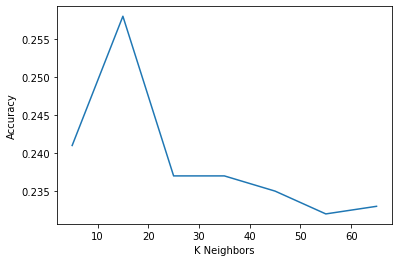

In [18]:
# KNN with 5 neighbors
# kfold with 10 folds

# importing packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# initializing data
# using all features except length and filename
KNN_X = recon_data
KNN_y = mydata['label']

# hyperparameter values list - number of nearest neighbors to check
neighbors = [5, 15, 25, 35, 45, 55, 65]

# list to store the average accuracy scores
average_scores = []

# iterating through hyperparameter values
for n in neighbors:
    # initialize kfold
    kf = KFold(n_splits=10, shuffle=True, random_state=1)

    # initialize classifier
    knn = KNeighborsClassifier(n_neighbors=n)

    # list of scores (accuracy) for each fold
    scores = []

    # 10 folds
    for train_index, test_index in kf.split(KNN_X):
        
        # initialize independent variables for current fold
        KNN_X_train, KNN_X_test = KNN_X.iloc[train_index], KNN_X.iloc[test_index]
        
        # initialize dependent variables for current fold
        KNN_y_train, KNN_y_test = KNN_y.iloc[train_index], KNN_y.iloc[test_index]

        # fit the KNN model
        knn.fit(KNN_X_train, KNN_y_train)

        # return accuracy of KNN model on testing data
        scores.append(knn.score(KNN_X_test, KNN_y_test))

    # get mean of accuracy values for current number of neighbors
    average_score = np.mean(scores)
    
    # add mean accuracy value to list
    average_scores.append(average_score)
    
    print(f"Number of Neighbors: {n}")
    print(scores)
    print(f"Average score: {average_score}")
    print()
    
# plot the results
plt.plot(neighbors, average_scores)
plt.xlabel("K Neighbors")
plt.ylabel("Accuracy")

KNN with original data

Number of Neighbors: 5
[0.23, 0.33, 0.27, 0.24, 0.26, 0.24, 0.3, 0.24, 0.29, 0.26]
Average score: 0.266

Number of Neighbors: 15
[0.26, 0.27, 0.3, 0.31, 0.29, 0.26, 0.3, 0.23, 0.33, 0.32]
Average score: 0.28700000000000003

Number of Neighbors: 25
[0.25, 0.26, 0.3, 0.29, 0.26, 0.26, 0.33, 0.25, 0.31, 0.3]
Average score: 0.281

Number of Neighbors: 35
[0.25, 0.27, 0.29, 0.31, 0.3, 0.23, 0.29, 0.26, 0.25, 0.3]
Average score: 0.275

Number of Neighbors: 45
[0.25, 0.29, 0.31, 0.27, 0.26, 0.21, 0.36, 0.23, 0.25, 0.27]
Average score: 0.27

Number of Neighbors: 55
[0.26, 0.29, 0.35, 0.24, 0.28, 0.21, 0.33, 0.24, 0.26, 0.24]
Average score: 0.27

Number of Neighbors: 65
[0.26, 0.31, 0.33, 0.25, 0.29, 0.24, 0.28, 0.21, 0.26, 0.25]
Average score: 0.26799999999999996



Text(0, 0.5, 'Accuracy')

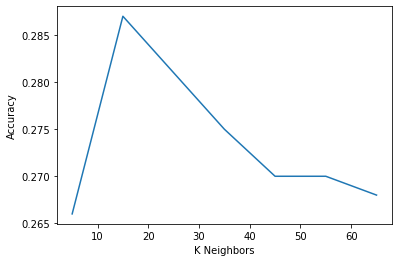

In [19]:
# KNN with 5 neighbors
# kfold with 10 folds

# initializing data
# using all features except length and filename
KNN_X = mydata.drop(["length", 'filename','label'], axis = 1)
KNN_y = mydata['label']

# hyperparameter values list - number of nearest neighbors to check
neighbors = [5, 15, 25, 35, 45, 55, 65]

# list to store the average accuracy scores
average_scores = []

# iterating through hyperparameter values
for n in neighbors:
    # initialize kfold
    kf = KFold(n_splits=10, shuffle=True, random_state=1)

    # initialize classifier
    knn = KNeighborsClassifier(n_neighbors=n)

    # list of scores (accuracy) for each fold
    scores = []

    # 10 folds
    for train_index, test_index in kf.split(KNN_X):
        
        # initialize independent variables for current fold
        KNN_X_train, KNN_X_test = KNN_X.iloc[train_index], KNN_X.iloc[test_index]
        
        # initialize dependent variables for current fold
        KNN_y_train, KNN_y_test = KNN_y.iloc[train_index], KNN_y.iloc[test_index]

        # fit the KNN model
        knn.fit(KNN_X_train, KNN_y_train)

        # return accuracy of KNN model on testing data
        scores.append(knn.score(KNN_X_test, KNN_y_test))

    # get mean of accuracy values for current number of neighbors
    average_score = np.mean(scores)
    
    # add mean accuracy value to list
    average_scores.append(average_score)
    
    print(f"Number of Neighbors: {n}")
    print(scores)
    print(f"Average score: {average_score}")
    print()
    
# plot the results
plt.plot(neighbors, average_scores)
plt.xlabel("K Neighbors")
plt.ylabel("Accuracy")

KNN with data reduced to 2 dimentions by t-sne

In [20]:
from sklearn.manifold import TSNE
X = mydata.drop(["length", 'filename','label'], axis = 1)
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(X)
print(type(X_embedded),X_embedded)
X_embedded.shape

<class 'numpy.ndarray'> [[  7.2300415  12.171275 ]
 [-36.881466   78.70259  ]
 [ 39.268654   27.550747 ]
 ...
 [ 32.529743   47.135437 ]
 [-61.54263    -4.2311444]
 [-43.887325  -51.220566 ]]


(1000, 2)

Number of Neighbors: 5
[0.25, 0.27, 0.28, 0.29, 0.29, 0.25, 0.31, 0.24, 0.31, 0.22]
Average score: 0.271

Number of Neighbors: 15
[0.24, 0.28, 0.3, 0.23, 0.32, 0.23, 0.28, 0.22, 0.24, 0.26]
Average score: 0.25999999999999995

Number of Neighbors: 25
[0.24, 0.27, 0.24, 0.23, 0.3, 0.25, 0.28, 0.21, 0.28, 0.27]
Average score: 0.257

Number of Neighbors: 35
[0.22, 0.23, 0.29, 0.24, 0.26, 0.21, 0.28, 0.21, 0.29, 0.22]
Average score: 0.24500000000000002

Number of Neighbors: 45
[0.27, 0.25, 0.25, 0.24, 0.28, 0.23, 0.26, 0.19, 0.26, 0.21]
Average score: 0.244

Number of Neighbors: 55
[0.21, 0.2, 0.24, 0.24, 0.22, 0.25, 0.26, 0.17, 0.24, 0.25]
Average score: 0.22800000000000004

Number of Neighbors: 65
[0.24, 0.24, 0.29, 0.26, 0.22, 0.21, 0.25, 0.2, 0.25, 0.25]
Average score: 0.24100000000000002



Text(0, 0.5, 'Accuracy')

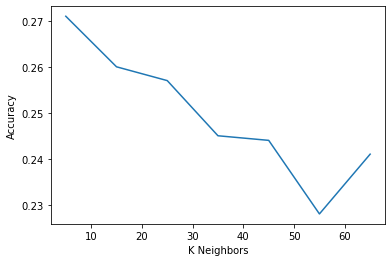

In [21]:
# KNN with 5 neighbors
# kfold with 10 folds

# initializing data
# using all features except length and filename
KNN_X = pd.DataFrame(X_embedded)
KNN_y = mydata['label']

# hyperparameter values list - number of nearest neighbors to check
neighbors = [5, 15, 25, 35, 45, 55, 65]

# list to store the average accuracy scores
average_scores = []

# iterating through hyperparameter values
for n in neighbors:
    # initialize kfold
    kf = KFold(n_splits=10, shuffle=True, random_state=1)

    # initialize classifier
    knn = KNeighborsClassifier(n_neighbors=n)

    # list of scores (accuracy) for each fold
    scores = []

    # 10 folds
    for train_index, test_index in kf.split(KNN_X):
        
        # initialize independent variables for current fold
        KNN_X_train, KNN_X_test = KNN_X.iloc[train_index], KNN_X.iloc[test_index]
        
        # initialize dependent variables for current fold
        KNN_y_train, KNN_y_test = KNN_y.iloc[train_index], KNN_y.iloc[test_index]

        # fit the KNN model
        knn.fit(KNN_X_train, KNN_y_train)

        # return accuracy of KNN model on testing data
        scores.append(knn.score(KNN_X_test, KNN_y_test))

    # get mean of accuracy values for current number of neighbors
    average_score = np.mean(scores)
    
    # add mean accuracy value to list
    average_scores.append(average_score)
    
    print(f"Number of Neighbors: {n}")
    print(scores)
    print(f"Average score: {average_score}")
    print()
    
# plot the results
plt.plot(neighbors, average_scores)
plt.xlabel("K Neighbors")
plt.ylabel("Accuracy")

In [22]:
# repeating the above algorithm, except only comparing classical and pop

# get indices of classical or pop songs
clas_pop_idx = mydata[mydata['label'].isin(['pop','classical'])].index
print(type(clas_pop_idx),type(recon_data))
print(clas_pop_idx.shape, recon_data.shape)
KNN_X = recon_data.iloc[clas_pop_idx]
KNN_Y = mydata.iloc[clas_pop_idx]['label']

X = mydata[mydata['label'].isin(['pop','classical'])]
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(X)
X

<class 'pandas.core.indexes.numeric.Int64Index'> <class 'pandas.core.frame.DataFrame'>
(200,) (1000, 57)


Number of Neighbors: 5
[1.0, 0.9, 1.0, 0.9, 0.95, 0.95, 1.0, 0.85, 0.95, 1.0]
Average score: 0.95

Number of Neighbors: 15
[1.0, 0.9, 1.0, 0.9, 0.9, 0.95, 1.0, 0.8, 0.9, 1.0]
Average score: 0.9349999999999999

Number of Neighbors: 25
[1.0, 0.9, 1.0, 0.9, 0.9, 0.95, 1.0, 0.85, 0.9, 1.0]
Average score: 0.9400000000000001

Number of Neighbors: 35
[1.0, 0.9, 1.0, 0.9, 0.9, 0.95, 1.0, 0.85, 0.9, 1.0]
Average score: 0.9400000000000001

Number of Neighbors: 45
[1.0, 0.9, 1.0, 0.9, 0.9, 0.95, 1.0, 0.8, 0.95, 1.0]
Average score: 0.9400000000000001

Number of Neighbors: 55
[0.95, 0.9, 1.0, 0.9, 0.9, 0.95, 1.0, 0.8, 0.95, 1.0]
Average score: 0.9349999999999999

Number of Neighbors: 65
[0.95, 0.95, 1.0, 0.9, 0.9, 0.95, 1.0, 0.75, 0.95, 1.0]
Average score: 0.9349999999999999



Text(0, 0.5, 'Accuracy')

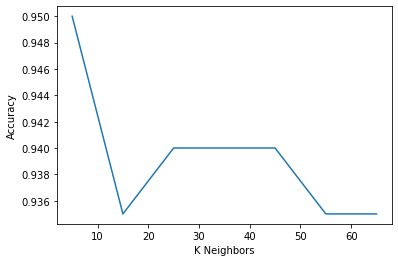

In [23]:
# hyperparameter values list - number of nearest neighbors to check
neighbors = [5, 15, 25, 35, 45, 55, 65]

# list to store the average accuracy scores
average_scores = []

# iterating through hyperparameter values
for n in neighbors:
    # initialize kfold
    kf = KFold(n_splits=10, shuffle=True, random_state=1)

    # initialize classifier
    knn = KNeighborsClassifier(n_neighbors=n)

    # list of scores (accuracy) for each fold
    scores = []

    # 10 folds
    for train_index, test_index in kf.split(KNN_X):
        
        # initialize independent variables for current fold
        KNN_X_train, KNN_X_test = KNN_X.iloc[train_index], KNN_X.iloc[test_index]
        
        # initialize dependent variables for current fold
        KNN_y_train, KNN_y_test = KNN_y.iloc[train_index], KNN_y.iloc[test_index]

        # fit the KNN model
        knn.fit(KNN_X_train, KNN_y_train)

        # return accuracy of KNN model on testing data
        scores.append(knn.score(KNN_X_test, KNN_y_test))

    # get mean of accuracy values for current number of neighbors
    average_score = np.mean(scores)
    
    # add mean accuracy value to list
    average_scores.append(average_score)
    
    print(f"Number of Neighbors: {n}")
    print(scores)
    print(f"Average score: {average_score}")
    print()

# plot the results
plt.plot(neighbors, average_scores)
plt.xlabel("K Neighbors")
plt.ylabel("Accuracy")

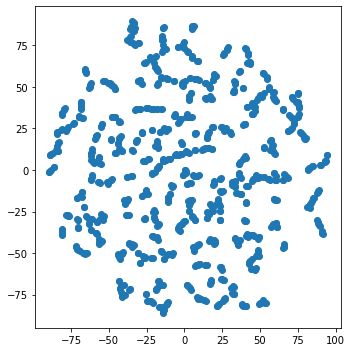

In [24]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [5,5]
plt.rcParams["figure.autolayout"] = True

data = X_embedded

# Scatter plot
plt.scatter(data[:, 0], data[:, 1], cmap='hot')

# Display the plot
plt.show()

In [25]:
# repeating the above plotting, except only comparing classical and pop

# get indices of classical or pop songs
clas_pop_idx = mydata[mydata['label'].isin(['hiphop'])].index
KNN_X = pd.DataFrame(X_embedded).iloc[clas_pop_idx]
KNN_Y = mydata.iloc[clas_pop_idx]['label']
print(KNN_X.shape,type(KNN_X))

(100, 2) <class 'pandas.core.frame.DataFrame'>


<class 'numpy.ndarray'>


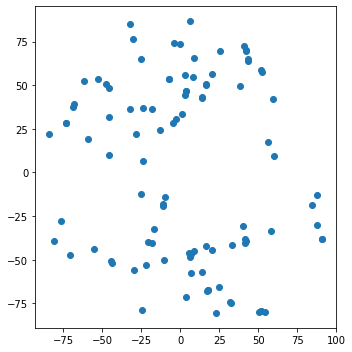

In [26]:
# Set the figure size
plt.rcParams["figure.figsize"] = [5,5]
plt.rcParams["figure.autolayout"] = True

data = KNN_X.to_numpy()
print(type(data))

# Scatter plot
plt.scatter(data[:, 0], data[:, 1], cmap='hot')

# Display the plot
plt.show()

Number of Neighbors: 5
[1.0, 0.95, 1.0, 0.9, 0.95, 0.95, 1.0, 0.8, 0.95, 0.95]
Average score: 0.945

Number of Neighbors: 15
[1.0, 0.9, 1.0, 0.9, 0.9, 0.95, 1.0, 0.8, 0.95, 1.0]
Average score: 0.9400000000000001

Number of Neighbors: 25
[1.0, 0.95, 1.0, 0.9, 0.9, 0.95, 1.0, 0.8, 0.95, 1.0]
Average score: 0.945

Number of Neighbors: 35
[1.0, 0.9, 1.0, 0.9, 0.9, 0.95, 1.0, 0.8, 0.95, 1.0]
Average score: 0.9400000000000001

Number of Neighbors: 45
[1.0, 0.9, 1.0, 0.9, 0.9, 0.95, 1.0, 0.8, 0.95, 1.0]
Average score: 0.9400000000000001

Number of Neighbors: 55
[1.0, 0.95, 1.0, 0.9, 0.95, 0.95, 1.0, 0.75, 0.95, 1.0]
Average score: 0.945

Number of Neighbors: 65
[0.95, 0.95, 1.0, 0.9, 0.95, 0.95, 1.0, 0.75, 0.95, 1.0]
Average score: 0.9399999999999998



Text(0, 0.5, 'Accuracy')

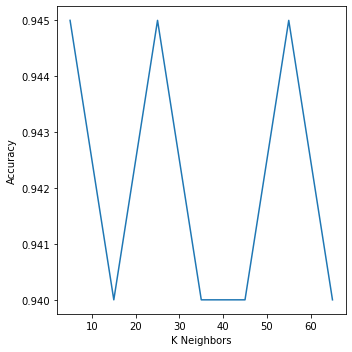

In [30]:
# KNN with original data - pop v classical
KNN_X = mydata.drop(labels=['filename','length','label'], axis=1)[mydata['label'].isin(['pop','classical'])]
KNN_y = mydata['label']

# hyperparameter values list - number of nearest neighbors to check
neighbors = [5, 15, 25, 35, 45, 55, 65]

# list to store the average accuracy scores
average_scores = []

# iterating through hyperparameter values
for n in neighbors:
    # initialize kfold
    kf = KFold(n_splits=10, shuffle=True, random_state=1)

    # initialize classifier
    knn = KNeighborsClassifier(n_neighbors=n)

    # list of scores (accuracy) for each fold
    scores = []

    # 10 folds
    for train_index, test_index in kf.split(KNN_X):
        
        # initialize independent variables for current fold
        KNN_X_train, KNN_X_test = KNN_X.iloc[train_index], KNN_X.iloc[test_index]
        
        # initialize dependent variables for current fold
        KNN_y_train, KNN_y_test = KNN_y.iloc[train_index], KNN_y.iloc[test_index]

        # fit the KNN model
        knn.fit(KNN_X_train, KNN_y_train)

        # return accuracy of KNN model on testing data
        scores.append(knn.score(KNN_X_test, KNN_y_test))

    # get mean of accuracy values for current number of neighbors
    average_score = np.mean(scores)
    
    # add mean accuracy value to list
    average_scores.append(average_score)
    
    print(f"Number of Neighbors: {n}")
    print(scores)
    print(f"Average score: {average_score}")
    print()
    
# plot the results
plt.plot(neighbors, average_scores)
plt.xlabel("K Neighbors")
plt.ylabel("Accuracy")

Number of Neighbors: 5
[0.9, 0.65, 0.8, 0.95, 0.95, 0.6, 0.65, 0.9, 0.75, 0.9]
Average score: 0.8049999999999999

Number of Neighbors: 15
[0.85, 0.6, 0.8, 0.9, 0.95, 0.7, 0.75, 0.9, 0.75, 0.75]
Average score: 0.795

Number of Neighbors: 25
[0.85, 0.7, 0.8, 0.85, 0.9, 0.7, 0.65, 0.85, 0.7, 0.75]
Average score: 0.775

Number of Neighbors: 35
[0.9, 0.7, 0.8, 0.85, 0.95, 0.6, 0.65, 0.85, 0.7, 0.8]
Average score: 0.78

Number of Neighbors: 45
[0.9, 0.8, 0.85, 0.85, 0.85, 0.6, 0.65, 0.85, 0.7, 0.8]
Average score: 0.785

Number of Neighbors: 55
[0.9, 0.8, 0.85, 0.9, 0.85, 0.6, 0.7, 0.85, 0.7, 0.8]
Average score: 0.795

Number of Neighbors: 65
[0.9, 0.8, 0.85, 0.9, 0.85, 0.6, 0.65, 0.85, 0.7, 0.8]
Average score: 0.79



Text(0, 0.5, 'Accuracy')

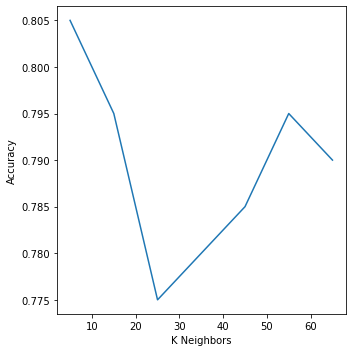

In [31]:
# KNN with original data - metal v disco
KNN_X = mydata.drop(labels=['filename','length','label'],axis=1)[mydata['label'].isin(['metal','disco'])]
KNN_y = mydata['label']

# hyperparameter values list - number of nearest neighbors to check
neighbors = [5, 15, 25, 35, 45, 55, 65]

# list to store the average accuracy scores
average_scores = []

# iterating through hyperparameter values
for n in neighbors:
    # initialize kfold
    kf = KFold(n_splits=10, shuffle=True, random_state=1)

    # initialize classifier
    knn = KNeighborsClassifier(n_neighbors=n)

    # list of scores (accuracy) for each fold
    scores = []

    # 10 folds
    for train_index, test_index in kf.split(KNN_X):
        
        # initialize independent variables for current fold
        KNN_X_train, KNN_X_test = KNN_X.iloc[train_index], KNN_X.iloc[test_index]
        
        # initialize dependent variables for current fold
        KNN_y_train, KNN_y_test = KNN_y.iloc[train_index], KNN_y.iloc[test_index]

        # fit the KNN model
        knn.fit(KNN_X_train, KNN_y_train)

        # return accuracy of KNN model on testing data
        scores.append(knn.score(KNN_X_test, KNN_y_test))

    # get mean of accuracy values for current number of neighbors
    average_score = np.mean(scores)
    
    # add mean accuracy value to list
    average_scores.append(average_score)
    
    print(f"Number of Neighbors: {n}")
    print(scores)
    print(f"Average score: {average_score}")
    print()
    
# plot the results
plt.plot(neighbors, average_scores)
plt.xlabel("K Neighbors")
plt.ylabel("Accuracy")